# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [32]:
#  1. Get the total rides for each city type
total_ride = pyber_data_df.groupby('type').count()['ride_id']
total_ride

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
drivers_bytype = pyber_data_df.groupby('type').sum()['driver_count']
drivers_bytype

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
fares_bytype = pyber_data_df.groupby('type').sum()['fare']
fares_bytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [22]:
total_fare_sr = pyber_data_df.groupby(['type','city']).count().reset_index().groupby('type').count()['city']
total_fare_df = pyber_data_df.groupby('type').agg({"city": pd.Series.nunique})

In [29]:
#  4. Get the average fare per ride for each city type.                              --------Q: better way to align keys?
fare_perCity_bytype = pyber_data_df.groupby('type').sum()['fare']/total_fare_df.iloc[:,0]
fare_perCity_bytype

type
Rural       240.440556
Suburban    537.675833
Urban       603.854242
dtype: float64

In [30]:
# 5. Get the average fare per driver for each city type. 
fare_perDriver_bytype = pyber_data_df.groupby('type').sum()['fare']/pyber_data_df.groupby('type').sum()['driver_count']
fare_perDriver_bytype

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [40]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'Total Ride':total_ride.map("{:,}".format),
                                 'Total Driver':drivers_bytype.map("{:,}".format),
                                'Total Fare':fare_avg_bytype.map("{:.2f}".format),
                                'Average Fare per Ride':fare_perCity_bytype.map("{:.2f}".format),
                                'Average Fare per Driver':fare_perDriver_bytype.map("{:.2f}".format)})
pyber_summary_df.head()

,Total Ride,Total Driver,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,537,240.44,240.44,8.06
Suburban,625,"8,570",537.68,537.68,2.26
Urban,"1,625","59,602",603.85,603.85,0.67


In [41]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
# in step 6

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [42]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [44]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_sum_bydate = pyber_data_df.groupby(['date','type']).sum()['fare']
fare_sum_bydate

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [45]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_sum_bydate = fare_sum_bydate.reset_index()


In [50]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_date_type_pvt = fare_sum_bydate.pivot_table(index='date',columns='type',values='fare',aggfunc = 'sum')
fare_date_type_pvt

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [53]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_pvt_2019 = fare_date_type_pvt.loc['2019-01-01':'2019-04-30']                        #----------? data setting
fare_pvt_2019.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN
2019-04-29 23:05:04,NaN,NaN,14.59
2019-04-29 23:10:18,NaN,29.39,NaN


In [55]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_pvt_2019.index = pd.to_datetime(fare_pvt_2019.index)

In [56]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_pvt_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [59]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_resample_df = fare_pvt_2019.resample('W').sum()
fare_resample_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


AttributeError: module 'matplotlib.pyplot' has no attribute 'x_axis'

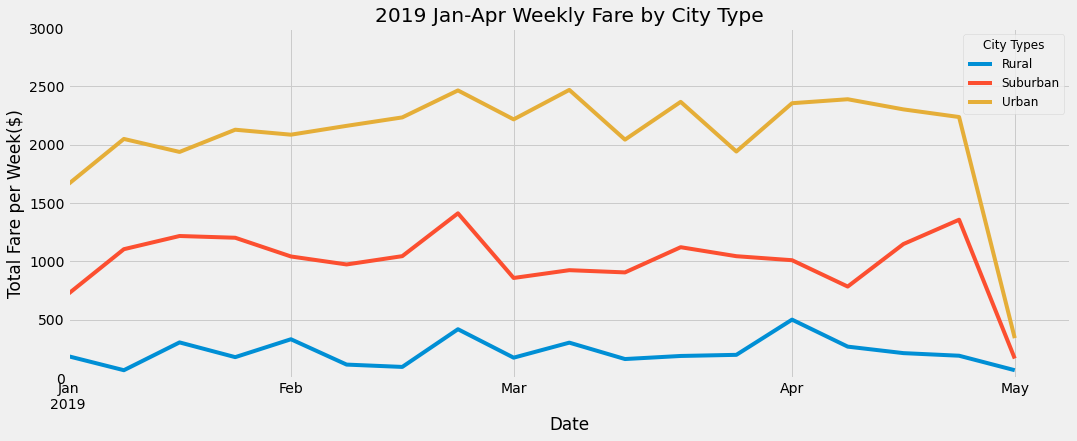

In [103]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fare_resample_df.plot(figsize = (16,6), title = "2019 Jan-Apr Weekly Fare by City Type",
                      xlabel ="Date",ylabel ="Total Fare per Week($)")
plt.xlim(min(fare_resample_df.index)+pd.Timedelta(days=-4),max(fare_resample_df.index)+pd.Timedelta(days=5))
plt.ylim(0,3000)
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.x.set_minor_locator(MultipleLocator(1))

plt.show()


In [75]:
pd.to_datetime(pd.to_numeric(min(fare_resample_df.index))-5)

TypeError: Invalid object type at position 0

In [98]:
min(fare_resample_df.index)+pd.DateOffset(days=8)
min(fare_resample_df.index)+pd.Timedelta(days=4)

Timestamp('2019-01-10 00:00:00', freq='W-SUN')